# Archivo para comparar varios modelos

In [1]:
import dataAcquisition
import ReparameterizationTrick
import Encoder
import Decoder
import VAE
import loss
import train
import Predictor
import importlib
import numpy as np
import tensorflow as tf
tf.config.run_functions_eagerly(False)


In [2]:
importlib.reload(dataAcquisition)

x_train, x_val, y_train, y_val, average_image, x_train_mix, x_test_mix,x_train_1, y_train_1 =  dataAcquisition.data_acquisition()

x_train(60k).shape:       (60000, 28, 28)
x_train_C.shape:     (55000, 28, 28, 1)
x_val_C.shape:     (5000, 28, 28, 1)
x_test_C.shape:      (10000, 28, 28, 1)
x_train.shape:       (55000, 28, 28)
x_val.shape:       (5000, 28, 28)
x_test.shape:       (10000, 28, 28)
x_train_mix.shape:  (55000, 28, 28)
x_test_mix.shape:  (10000, 28, 28)


In [3]:
import VAE
importlib.reload(VAE)

espacio_latente = [2, 4, 8, 16, 32]
modelos = []
for laten in espacio_latente:
    modelos.append(VAE.definir_modelo(x_train, y_train, latent_dim = laten, show_model=False) )
        

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_img           │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 784)       │          0 │ input_img[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 794)       │          0 │ flatten[0][0],    │
│ (Concatenate)       │                   │            │ encoder_conditio… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │    101,760 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 2)         │        258 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 2)         │        258 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sampling (Sampling) │ (None, 2)         │          0 │ z_mean[0][0],     │
│                     │                   │            │ z_log_var[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 102,276 (399.52 KB)

 Trainable params: 102,276 (399.52 KB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ z_sampling          │ (None, 2)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 12)        │          0 │ z_sampling[0][0], │
│ (Concatenate)       │                   │            │ decoder_conditio… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │      1,664 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 784)       │    101,136 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 28, 28, 1) │          0 │ dense_2[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 102,800 (401.56 KB)

 Trainable params: 102,800 (401.56 KB)

 Non-trainable params: 0 (0.00 B)

Model: "vae"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_img           │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder             │ [(None, 2),       │    102,276 │ input_img[0][0],  │
│ (Functional)        │ (None, 2), (None, │            │ encoder_conditio… │
│                     │ 2)]               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder             │ (None, 28, 28, 1) │    102,800 │ encoder[0][2],    │
│ (Functional)        │                   │            │ decoder_conditio… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 205,076 (801.08 KB)

 Trainable params: 205,076 (801.08 KB)

 Non-trainable params: 0 (0.00 B)

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_img           │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 784)       │          0 │ input_img[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 794)       │          0 │ flatten_1[0][0],  │
│ (Concatenate)       │                   │            │ encoder_conditio… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 128)       │    101,760 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 4)         │        516 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 4)         │        516 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sampling_1          │ (None, 4)         │          0 │ z_mean[0][0],     │
│ (Sampling)          │                   │            │ z_log_var[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 102,792 (401.53 KB)

 Trainable params: 102,792 (401.53 KB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ z_sampling          │ (None, 4)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 14)        │          0 │ z_sampling[0][0], │
│ (Concatenate)       │                   │            │ decoder_conditio… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 128)       │      1,920 │ concatenate_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 784)       │    101,136 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_1 (Reshape) │ (None, 28, 28, 1) │          0 │ dense_5[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 103,056 (402.56 KB)

 Trainable params: 103,056 (402.56 KB)

 Non-trainable params: 0 (0.00 B)

Model: "vae"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_img           │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder             │ [(None, 4),       │    102,792 │ input_img[0][0],  │
│ (Functional)        │ (None, 4), (None, │            │ encoder_conditio… │
│                     │ 4)]               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder             │ (None, 28, 28, 1) │    103,056 │ encoder[0][2],    │
│ (Functional)        │                   │            │ decoder_conditio… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 205,848 (804.09 KB)

 Trainable params: 205,848 (804.09 KB)

 Non-trainable params: 0 (0.00 B)

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_img           │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 784)       │          0 │ input_img[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_4       │ (None, 794)       │          0 │ flatten_2[0][0],  │
│ (Concatenate)       │                   │            │ encoder_conditio… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 128)       │    101,760 │ concatenate_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 8)         │      1,032 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 8)         │      1,032 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sampling_2          │ (None, 8)         │          0 │ z_mean[0][0],     │
│ (Sampling)          │                   │            │ z_log_var[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 103,824 (405.56 KB)

 Trainable params: 103,824 (405.56 KB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ z_sampling          │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_5       │ (None, 18)        │          0 │ z_sampling[0][0], │
│ (Concatenate)       │                   │            │ decoder_conditio… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 128)       │      2,432 │ concatenate_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 784)       │    101,136 │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_2 (Reshape) │ (None, 28, 28, 1) │          0 │ dense_8[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 103,568 (404.56 KB)

 Trainable params: 103,568 (404.56 KB)

 Non-trainable params: 0 (0.00 B)

Model: "vae"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_img           │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder             │ [(None, 8),       │    103,824 │ input_img[0][0],  │
│ (Functional)        │ (None, 8), (None, │            │ encoder_conditio… │
│                     │ 8)]               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder             │ (None, 28, 28, 1) │    103,568 │ encoder[0][2],    │
│ (Functional)        │                   │            │ decoder_conditio… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 207,392 (810.12 KB)

 Trainable params: 207,392 (810.12 KB)

 Non-trainable params: 0 (0.00 B)

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_img           │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 784)       │          0 │ input_img[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_6       │ (None, 794)       │          0 │ flatten_3[0][0],  │
│ (Concatenate)       │                   │            │ encoder_conditio… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 128)       │    101,760 │ concatenate_6[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 16)        │      2,064 │ dense_9[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 16)        │      2,064 │ dense_9[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sampling_3          │ (None, 16)        │          0 │ z_mean[0][0],     │
│ (Sampling)          │                   │            │ z_log_var[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 105,888 (413.62 KB)

 Trainable params: 105,888 (413.62 KB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ z_sampling          │ (None, 16)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_7       │ (None, 26)        │          0 │ z_sampling[0][0], │
│ (Concatenate)       │                   │            │ decoder_conditio… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 128)       │      3,456 │ concatenate_7[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 784)       │    101,136 │ dense_10[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_3 (Reshape) │ (None, 28, 28, 1) │          0 │ dense_11[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 104,592 (408.56 KB)

 Trainable params: 104,592 (408.56 KB)

 Non-trainable params: 0 (0.00 B)

Model: "vae"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_img           │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder             │ [(None, 16),      │    105,888 │ input_img[0][0],  │
│ (Functional)        │ (None, 16),       │            │ encoder_conditio… │
│                     │ (None, 16)]       │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder             │ (None, 28, 28, 1) │    104,592 │ encoder[0][2],    │
│ (Functional)        │                   │            │ decoder_conditio… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 210,480 (822.19 KB)

 Trainable params: 210,480 (822.19 KB)

 Non-trainable params: 0 (0.00 B)

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_img           │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_4 (Flatten) │ (None, 784)       │          0 │ input_img[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_8       │ (None, 794)       │          0 │ flatten_4[0][0],  │
│ (Concatenate)       │                   │            │ encoder_conditio… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 128)       │    101,760 │ concatenate_8[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 32)        │      4,128 │ dense_12[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 32)        │      4,128 │ dense_12[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sampling_4          │ (None, 32)        │          0 │ z_mean[0][0],     │
│ (Sampling)          │                   │            │ z_log_var[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 110,016 (429.75 KB)

 Trainable params: 110,016 (429.75 KB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ z_sampling          │ (None, 32)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_9       │ (None, 42)        │          0 │ z_sampling[0][0], │
│ (Concatenate)       │                   │            │ decoder_conditio… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 128)       │      5,504 │ concatenate_9[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 784)       │    101,136 │ dense_13[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_4 (Reshape) │ (None, 28, 28, 1) │          0 │ dense_14[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 106,640 (416.56 KB)

 Trainable params: 106,640 (416.56 KB)

 Non-trainable params: 0 (0.00 B)

Model: "vae"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_img           │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder             │ [(None, 32),      │    110,016 │ input_img[0][0],  │
│ (Functional)        │ (None, 32),       │            │ encoder_conditio… │
│                     │ (None, 32)]       │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_condition   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder             │ (None, 28, 28, 1) │    106,640 │ encoder[0][2],    │
│ (Functional)        │                   │            │ decoder_conditio… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 216,656 (846.31 KB)

 Trainable params: 216,656 (846.31 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
print( modelos)

[<Functional name=vae, built=True>, <Functional name=vae, built=True>, <Functional name=vae, built=True>, <Functional name=vae, built=True>, <Functional name=vae, built=True>]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


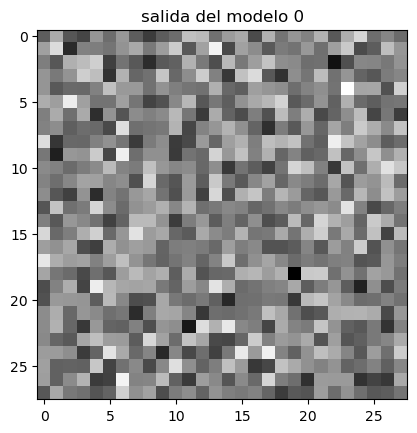

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


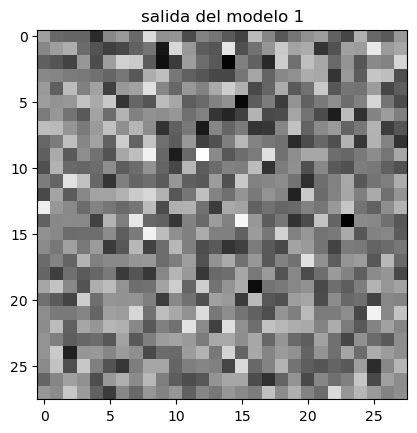

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


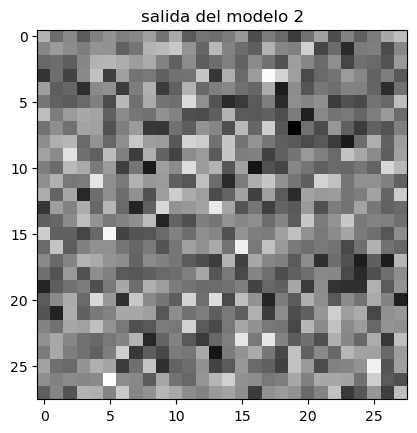

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


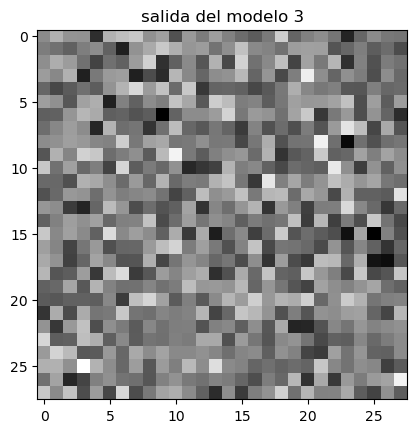

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


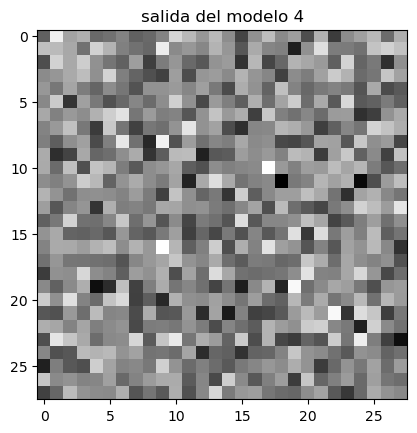

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
importlib.reload(loss)
# Optimizer ------------------------------------------------------------------
i=0
# Compile --------------------------------------------------------------------
for vae in modelos: 
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

    vae.compile(optimizer, loss=loss.vae_loss) #cambiar nombre

    img = np.expand_dims(x_train[0], axis=0)
    cond = np.expand_dims(y_train[0], axis=0)
    salida = vae.predict([img, cond,cond])

    reconstruccion = salida[0].reshape(28, 28)
    plt.imshow(reconstruccion, cmap='gray')
    plt.title(f"salida del modelo {i}")
    plt.show()
    i += 1

MODELO NÚMERO: 0
430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 70.1952 - val_loss: 39.8741
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


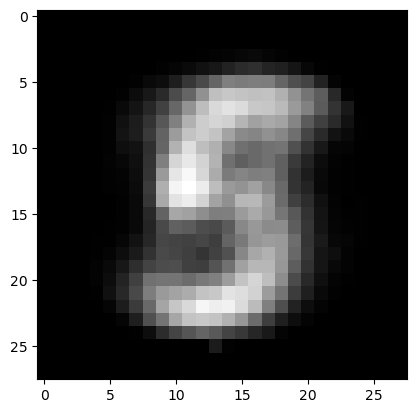

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 39.2765 - val_loss: 35.7063
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


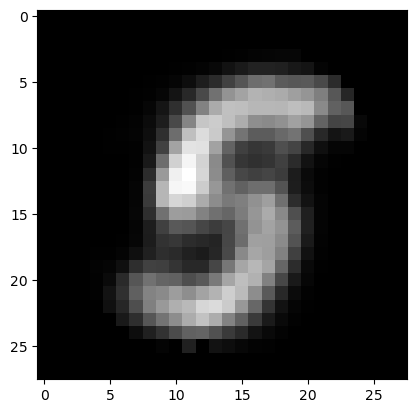

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 35.7699 - val_loss: 33.8714
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


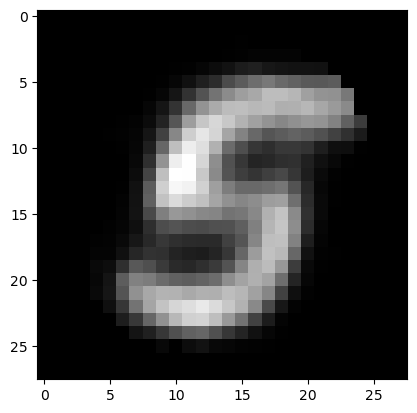

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 34.2613 - val_loss: 32.6974
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


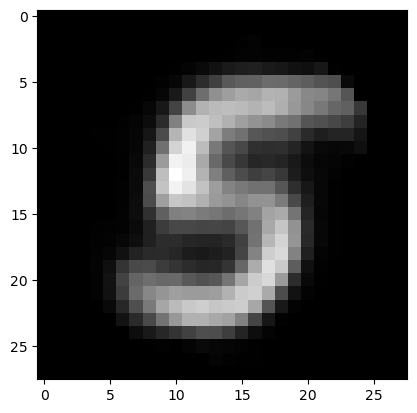

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 33.1770 - val_loss: 31.8971
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


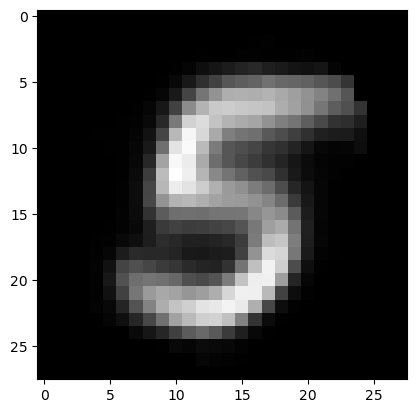

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 32.3733 - val_loss: 31.2983
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


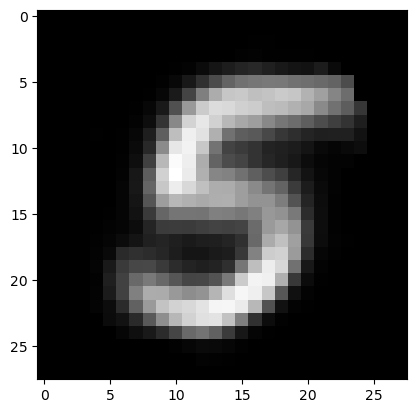

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 32.0012 - val_loss: 30.8187
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


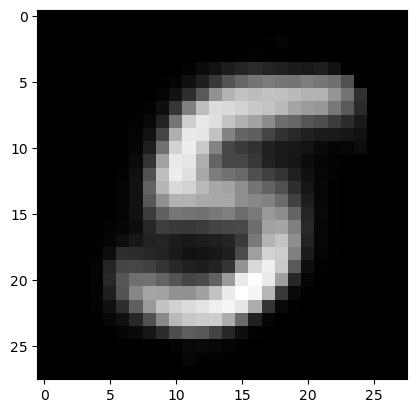

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 31.6003 - val_loss: 30.5047
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


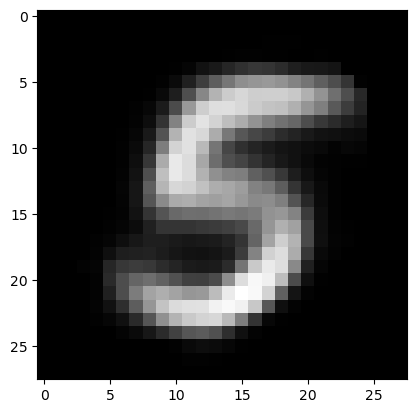

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 30.9485 - val_loss: 30.2041
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


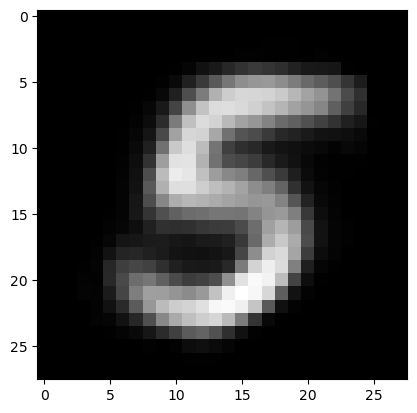

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 30.7839 - val_loss: 29.8897
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


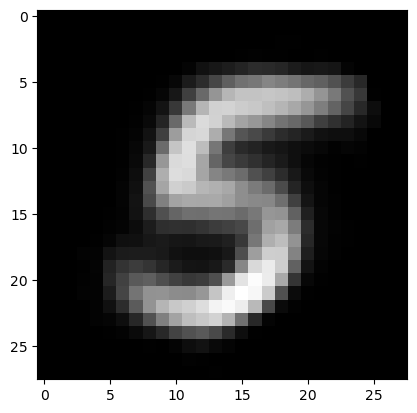

MODELO NÚMERO: 0
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 66.4482 - val_loss: 32.4556
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


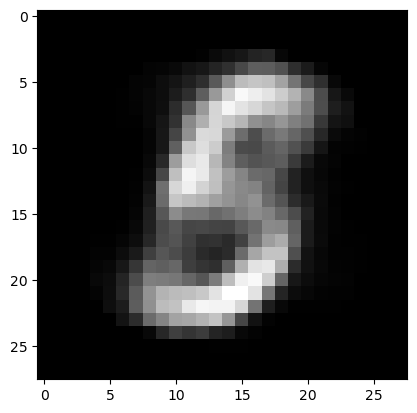

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 31.5896 - val_loss: 29.0234
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


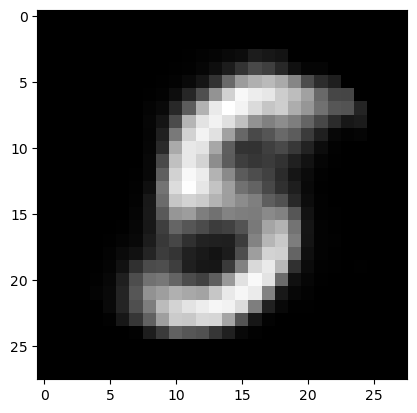

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 28.5284 - val_loss: 27.2574
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


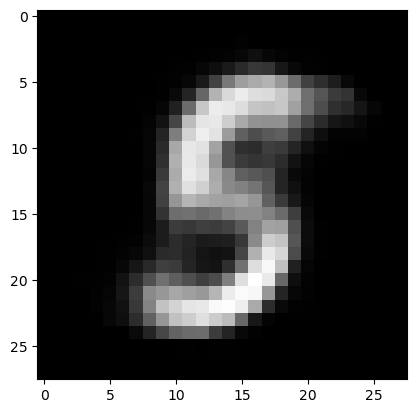

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 27.3406 - val_loss: 26.2707
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


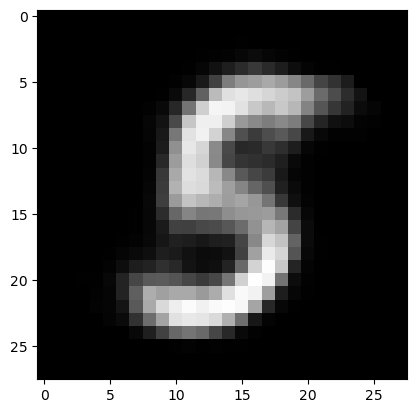

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 26.5399 - val_loss: 25.6478
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


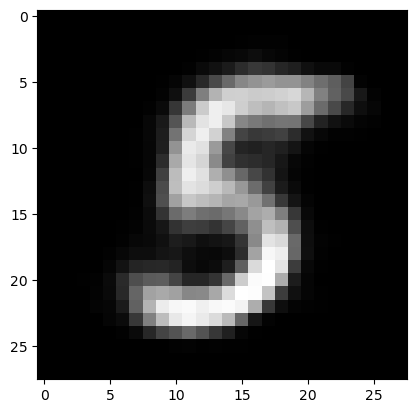

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 25.8859 - val_loss: 25.2231
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


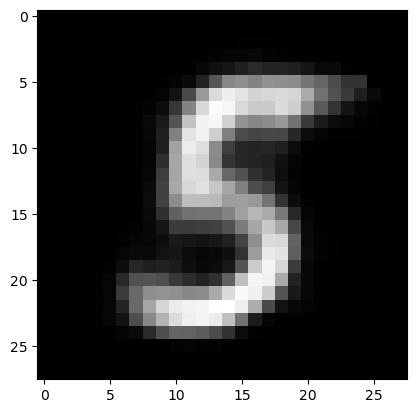

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 25.6107 - val_loss: 24.8711
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


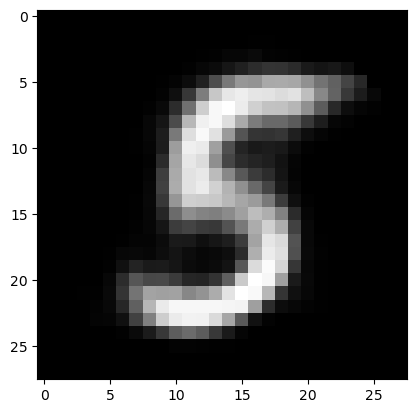

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 24.9810 - val_loss: 24.6509
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


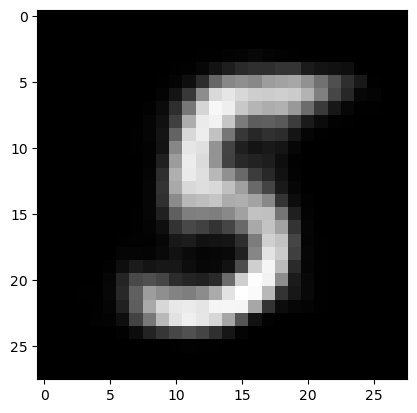

430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 24.9489 - val_loss: 24.3826
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


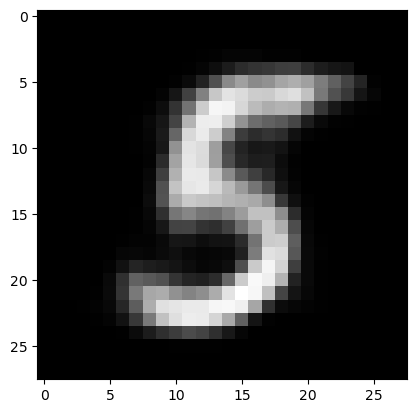

430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 24.7638 - val_loss: 24.2001
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


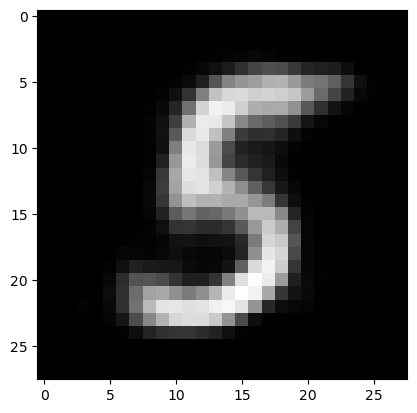

MODELO NÚMERO: 0
430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 63.9872 - val_loss: 26.3425
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


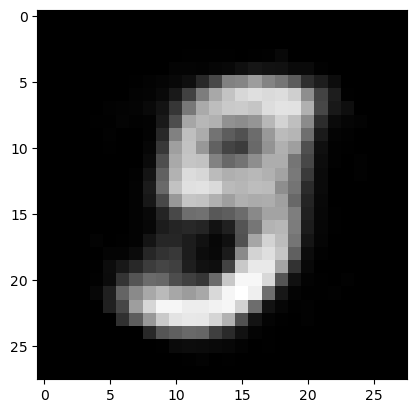

430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 25.3718 - val_loss: 22.7020
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


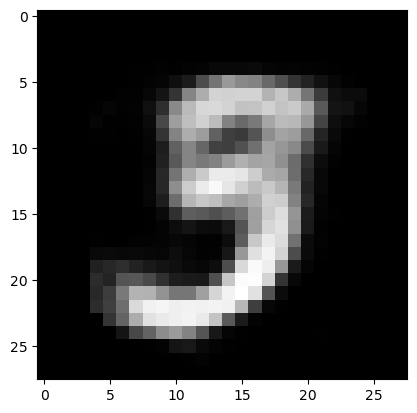

430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 22.4450 - val_loss: 21.2255
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


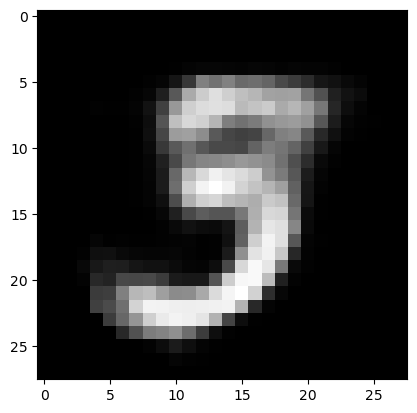

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 21.0917 - val_loss: 20.3124
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


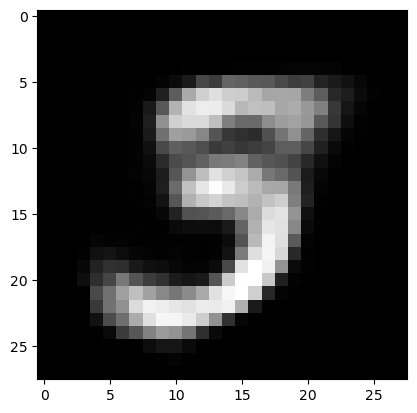

430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 20.3595 - val_loss: 19.6202
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


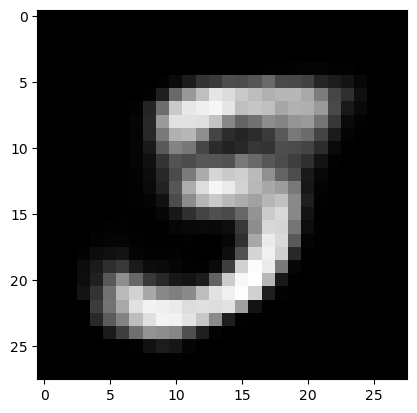

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 19.7362 - val_loss: 19.0834
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


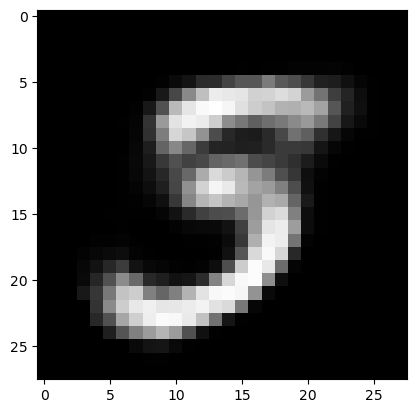

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 19.1843 - val_loss: 18.7264
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


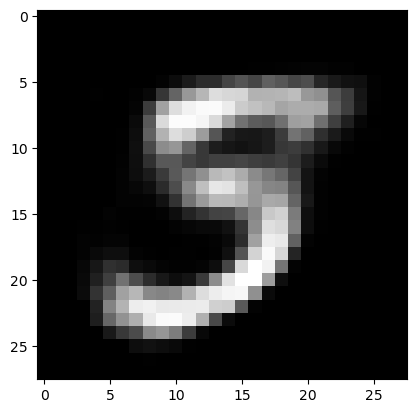

430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 18.7547 - val_loss: 18.4337
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


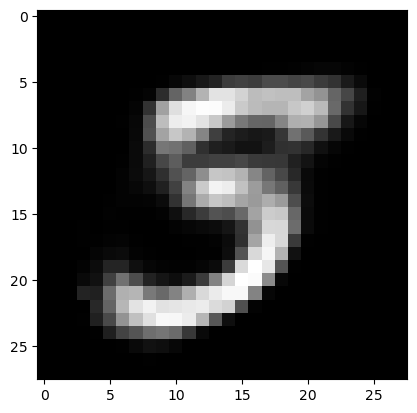

430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 18.5089 - val_loss: 18.1587
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


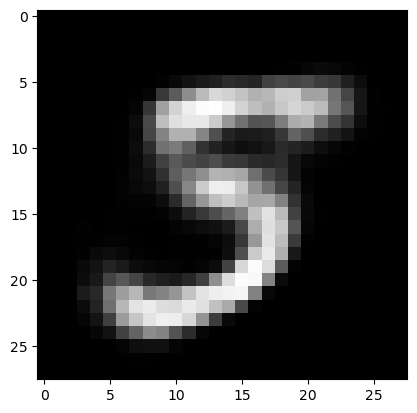

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 18.2769 - val_loss: 17.9331
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


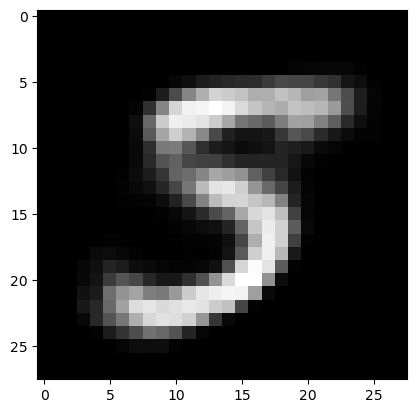

MODELO NÚMERO: 0
430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 61.4809 - val_loss: 22.3195
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


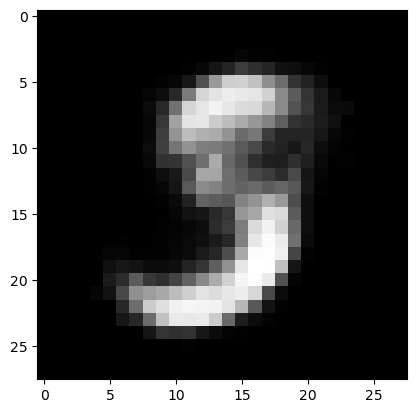

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 20.6765 - val_loss: 17.9078
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


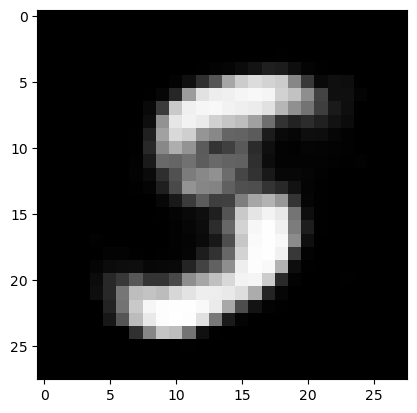

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 17.5190 - val_loss: 16.3542
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


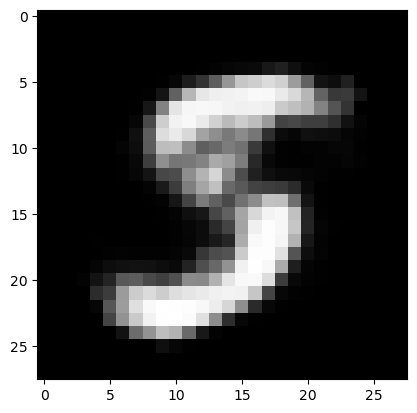

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 16.1169 - val_loss: 15.4611
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


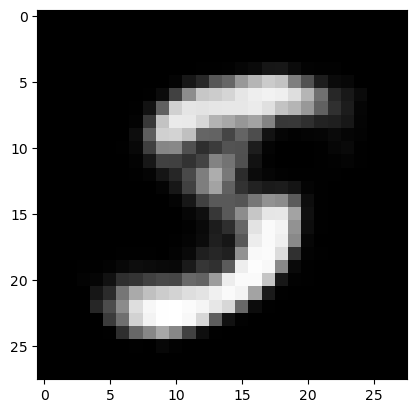

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 15.2157 - val_loss: 14.8487
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


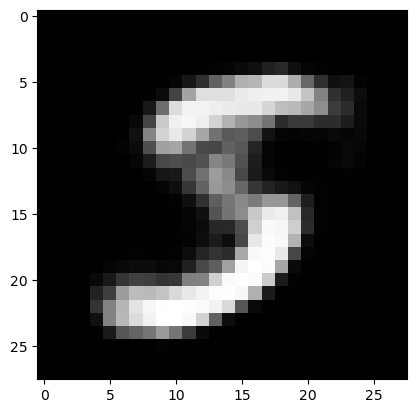

430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 14.6698 - val_loss: 14.2552
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


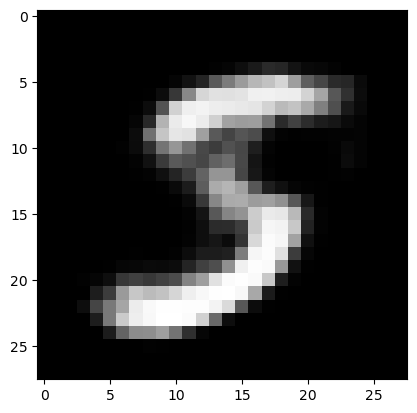

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 14.1868 - val_loss: 13.8694
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


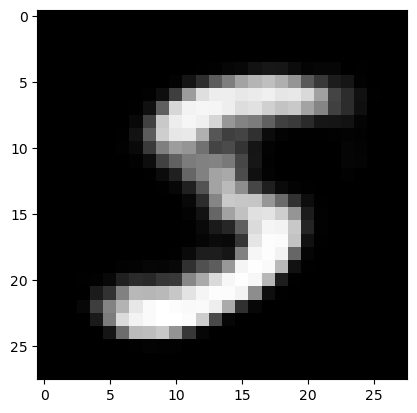

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 13.8249 - val_loss: 13.4860
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


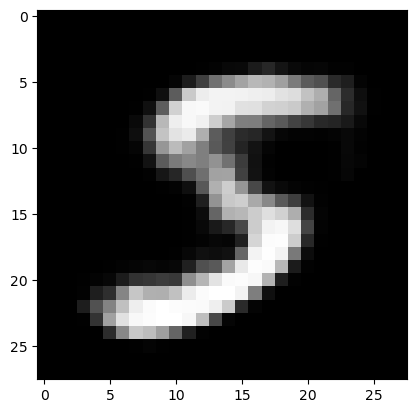

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 13.3379 - val_loss: 13.2334
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


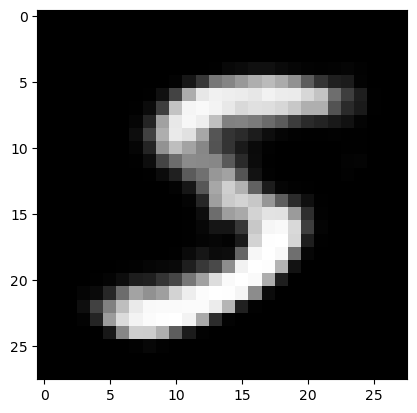

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 13.1046 - val_loss: 13.0214
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


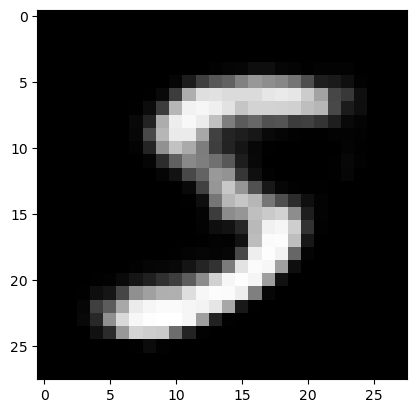

MODELO NÚMERO: 0
430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 58.1970 - val_loss: 18.6489
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


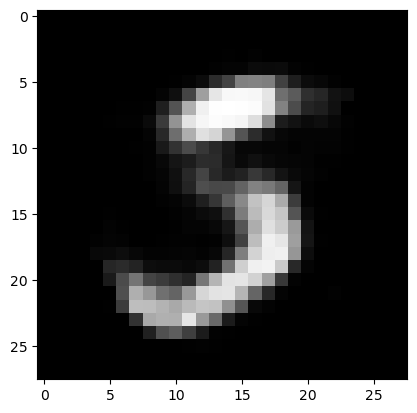

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 16.9346 - val_loss: 14.0802
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


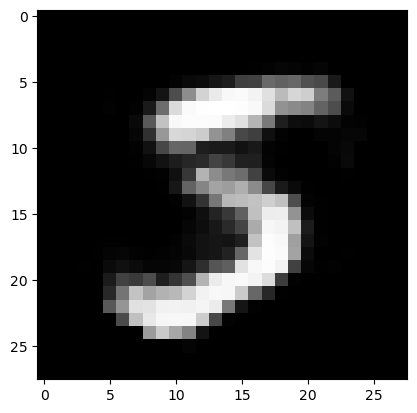

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 13.3379 - val_loss: 12.3832
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


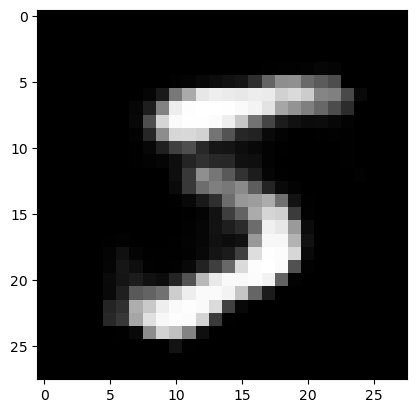

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 11.8817 - val_loss: 11.2732
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


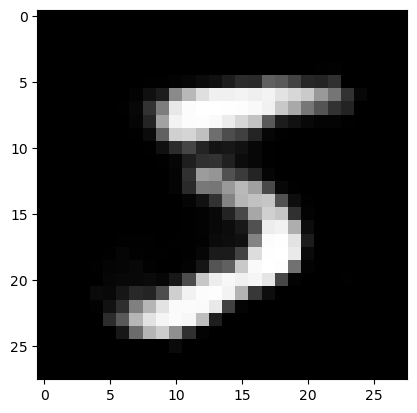

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 11.0319 - val_loss: 10.6710
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


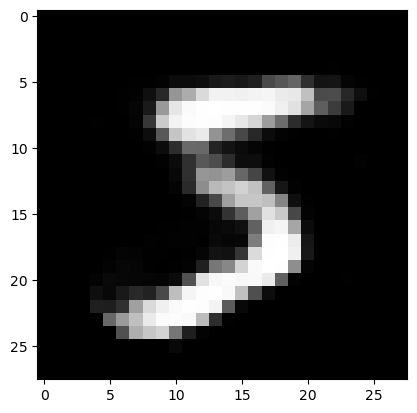

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 10.4130 - val_loss: 10.1927
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


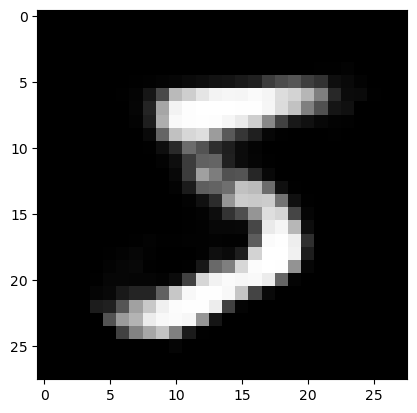

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 9.8237 - val_loss: 9.9340
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


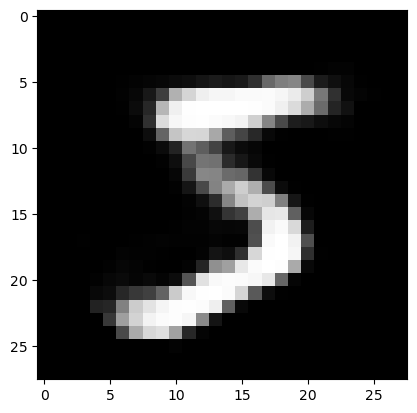

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 9.6310 - val_loss: 9.6414
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


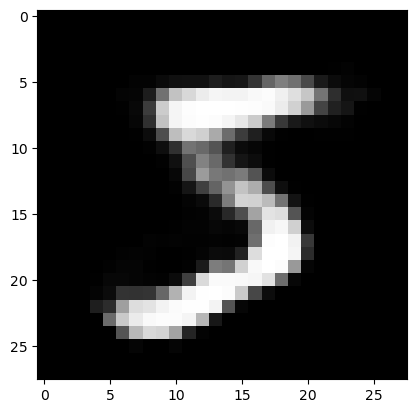

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 9.3506 - val_loss: 9.4037
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


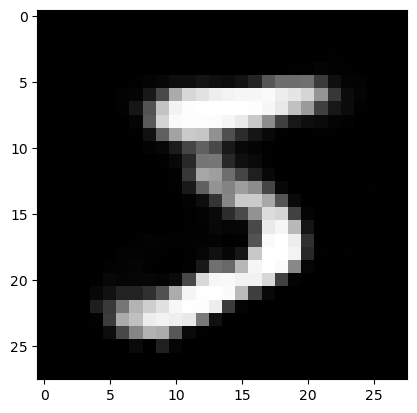

430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 9.0276 - val_loss: 9.2109
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


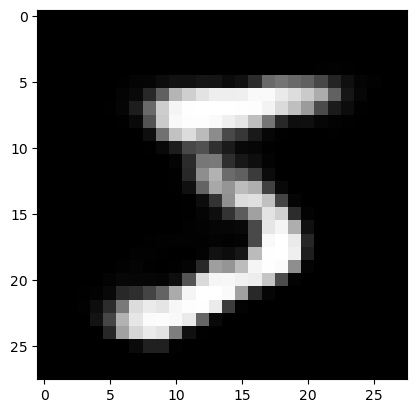

##############################################################


In [6]:
for vae in modelos:
    print(f"MODELO NÚMERO: 0")
    for i in range(10):
        train.train(vae, x_train, y_train, x_val, y_val)
        salida = vae.predict([img, cond, cond])
        reconstruccion = salida[0].reshape(28, 28)
        plt.imshow(reconstruccion, cmap='gray')
        plt.show()

print("##############################################################")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


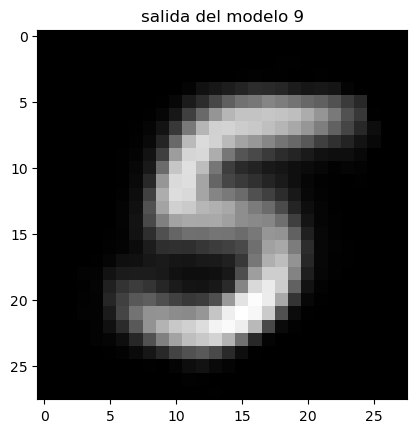

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


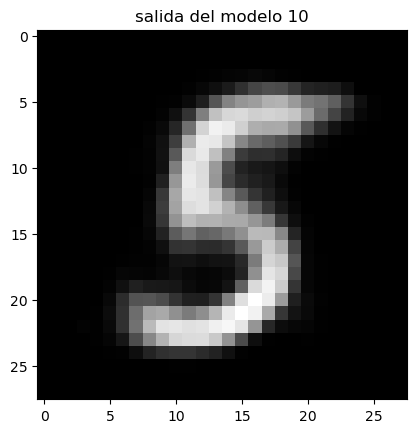

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


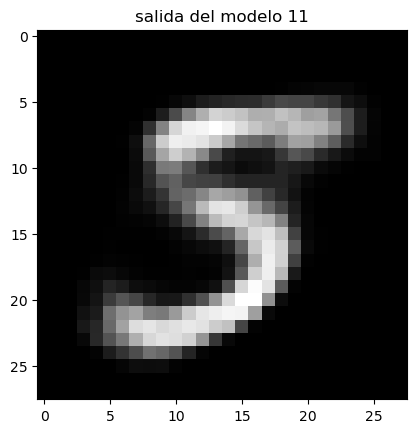

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


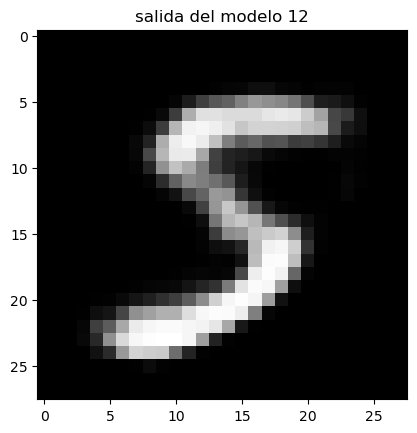

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


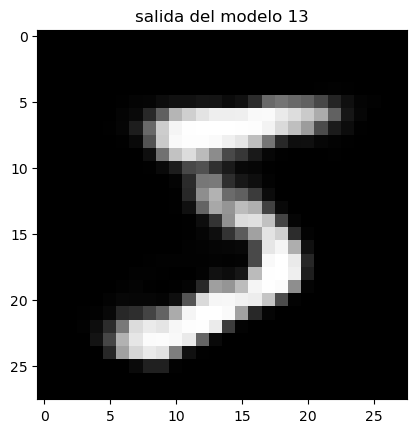

In [7]:
for vae in modelos: 
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

    vae.compile(optimizer, loss=loss.vae_loss) #cambiar nombre

    img = np.expand_dims(x_train[0], axis=0)
    cond = np.expand_dims(y_train[0], axis=0)
    salida = vae.predict([img, cond,cond])

    reconstruccion = salida[0].reshape(28, 28)
    plt.imshow(reconstruccion, cmap='gray')
    plt.title(f"salida del modelo {i}")
    plt.show()
    i += 1

Model: "predictor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ original_input (InputLayer)     │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_layer (ReshapeLayer)    │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 14, 14, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │        31,370 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,186 (196.04 KB)

 Trainable params: 50,186 (196.04 KB)

 Non-trainable params: 0 (0.00 B)

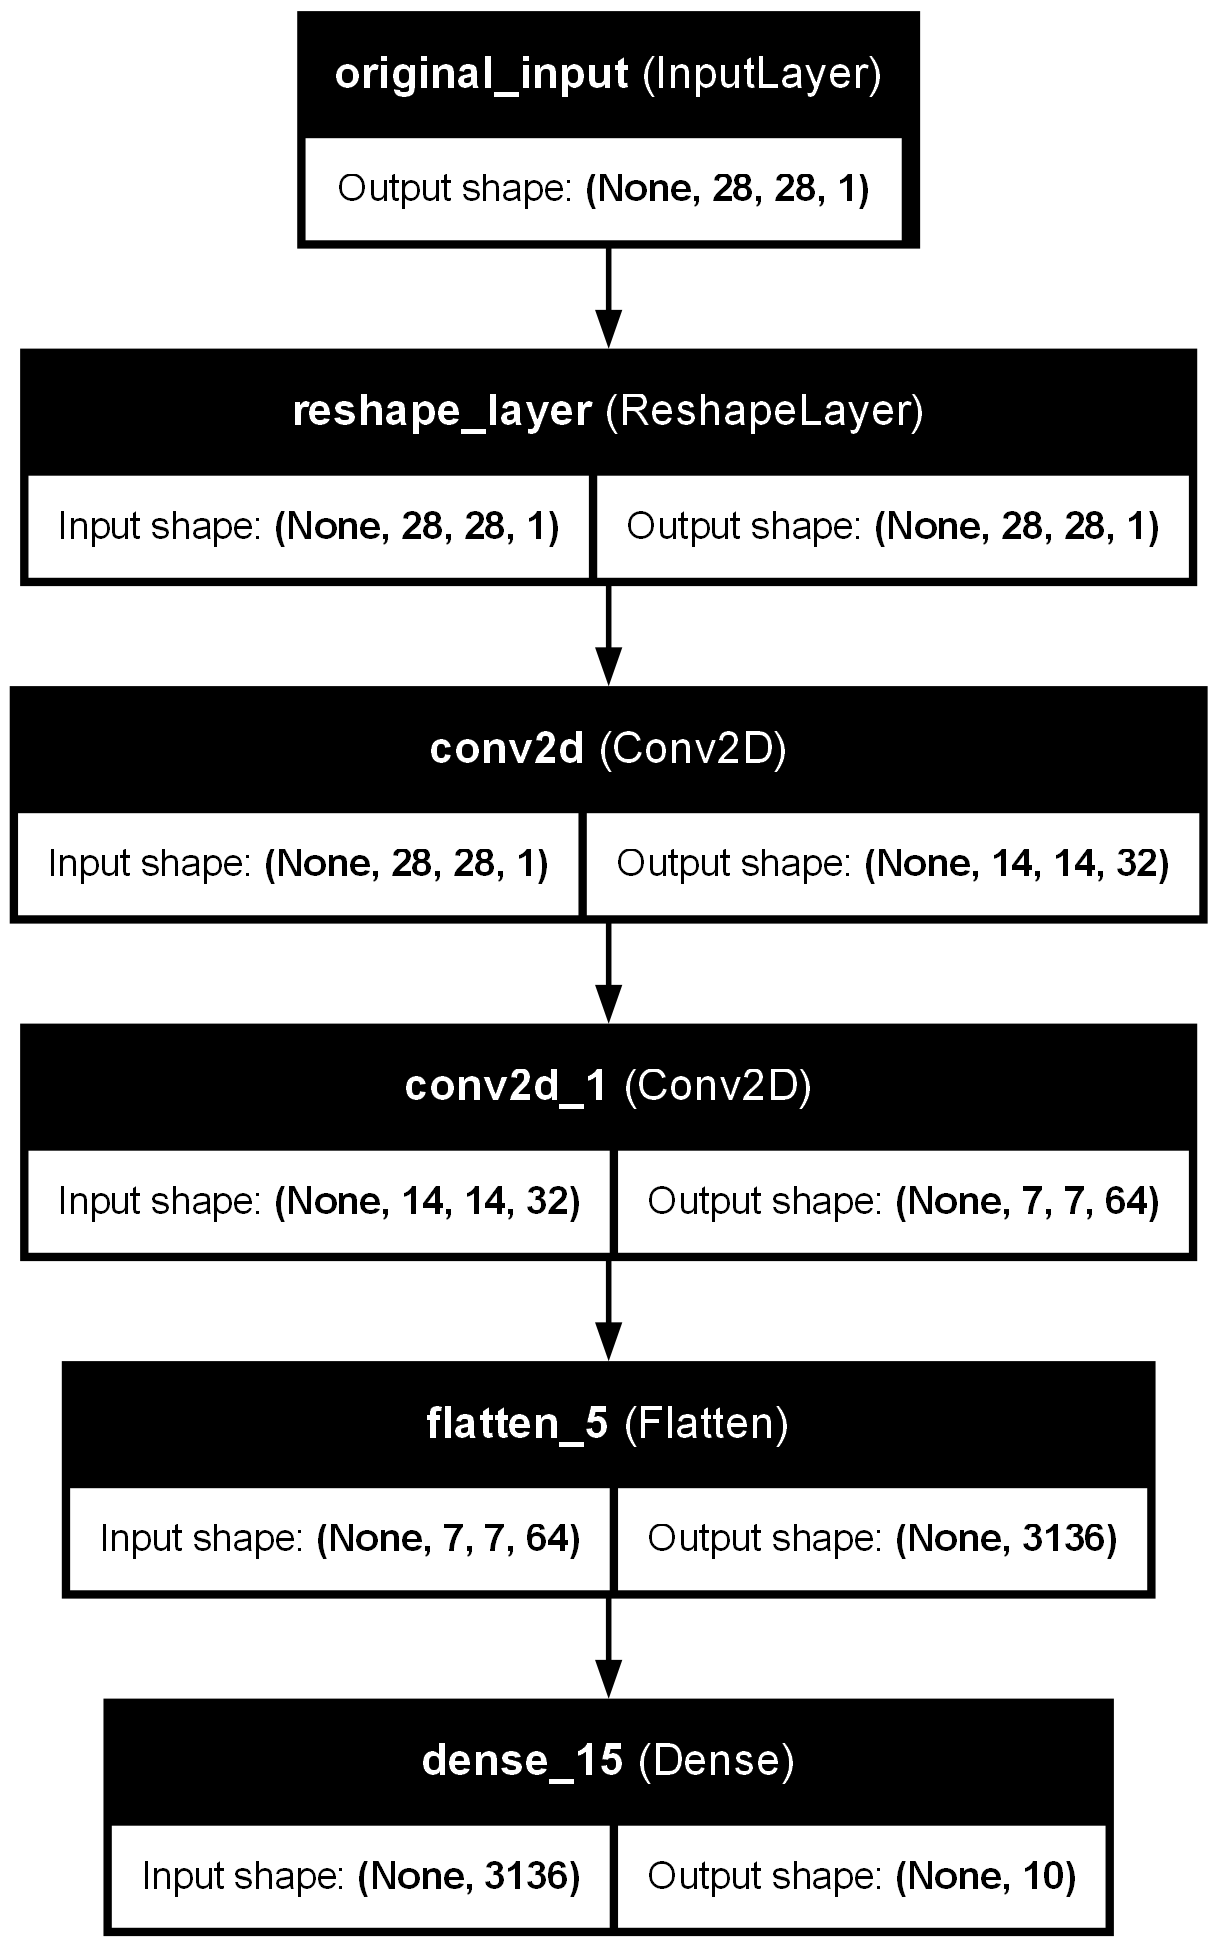

(1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


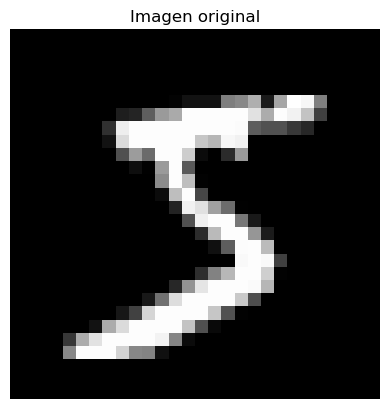

prediccion  9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.7079 - val_loss: 0.1128
prediccion  9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.1170 - val_loss: 0.0736
prediccion  5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0724 - val_loss: 0.0645
prediccion  5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0575 - val_loss: 0.0620
prediccion  5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0491 - val_loss: 0.0537


In [8]:
predictor_c = Predictor.predictor()
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
predictor_c.compile(optimizer, loss="categorical_crossentropy")
print(img.shape)
prediccion = np.argmax( predictor_c.predict(img))
img[0].reshape(28, 28)
plt.imshow(img[0], cmap='gray')
plt.title("Imagen original")
plt.axis('off')
plt.show()

for i in range(5): 
    #reconstruccion = prediccion[0].reshape(28, 28)
    print(f"prediccion  {prediccion}")
    prediccion = np.argmax(predictor_c.predict(img))


    predictor_c.fit(
        x=x_train,
        y=y_train,
        batch_size=128,
        epochs=1,
        validation_data=(x_val, y_val)  # Include validation data
        )

MODELO NÚMERO: 0


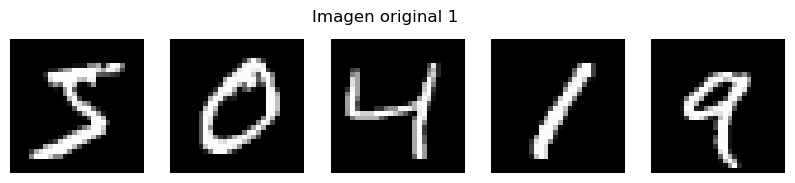

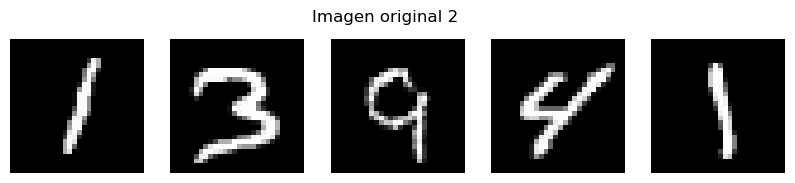

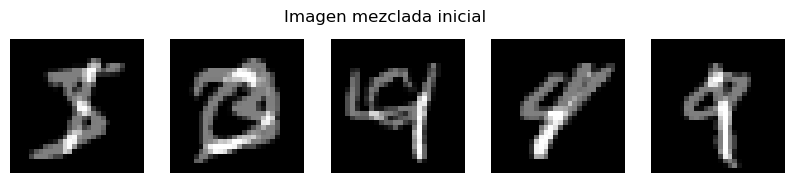

NameError: name 'encoder' is not defined

In [17]:
import inferencias
importlib.reload(inferencias)
# Suponiendo que ya tienes definidos:
# x_train, x_train_1, y_train, y_train_1, predictor, encoder, decoder

for vae in modelos:
    print(f"MODELO NÚMERO: 0")
                                #x_train, x_train_1, y_train, predictor, y_train_1,
    inferencias.inferncia_modelo(x_train[0:10], x_train_1[0:10], y_train[0:10], predictor_c, y_train_1[0:10],vae)

print("##############################################################")



